In [1]:
pwd

'C:\\Users\\USER\\Desktop\\아카이브\\마라톤데이터_ch2.시각화'

In [7]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 1. column 차트

### part1. 참가자 많은 나이 순서대로 column chart 그리기

In [10]:
marathon_2015_2017 = pd.read_csv('data/marathon_2015_2017.csv')

In [11]:
# 미국인 데이터만 가져오기 . 변수만들고 저장
USA_runner = marathon_2015_2017[marathon_2015_2017.Country == 'USA']

In [12]:
print(USA_runner.shape)
USA_runner.head(3)

(64474, 21)


,Name,Age,M/F,City,State,Country,5K,10K,15K,20K,...,25K,30K,35K,40K,Pace,Official Time,Overall,Gender,Division,Year
6,"Ritzenhein, Dathan",32,M,Rockford,MI,USA,885,1785,2720,3643,...,4565,5519,6486,7445,301,7880,7,7,7,2015
7,"Keflezighi, Meb",39,M,San Diego,CA,USA,884,1784,2699,3630,...,4567,5519,6479,7498,304,7962,8,8,8,2015
10,"Tegenkamp, Matt",33,M,Portland,OR,USA,886,1790,2733,3680,...,4628,5592,6592,7615,307,8032,11,11,11,2015


In [13]:
USA_runner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64474 entries, 6 to 79637
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           64474 non-null  object
 1   Age            64474 non-null  int64 
 2   M/F            64474 non-null  object
 3   City           64474 non-null  object
 4   State          64474 non-null  object
 5   Country        64474 non-null  object
 6   5K             64474 non-null  int64 
 7   10K            64474 non-null  int64 
 8   15K            64474 non-null  int64 
 9   20K            64474 non-null  int64 
 10  Half           64474 non-null  int64 
 11  25K            64474 non-null  int64 
 12  30K            64474 non-null  int64 
 13  35K            64474 non-null  int64 
 14  40K            64474 non-null  int64 
 15  Pace           64474 non-null  int64 
 16  Official Time  64474 non-null  int64 
 17  Overall        64474 non-null  int64 
 18  Gender         64474 non-n

### (1) State 별 runner 수

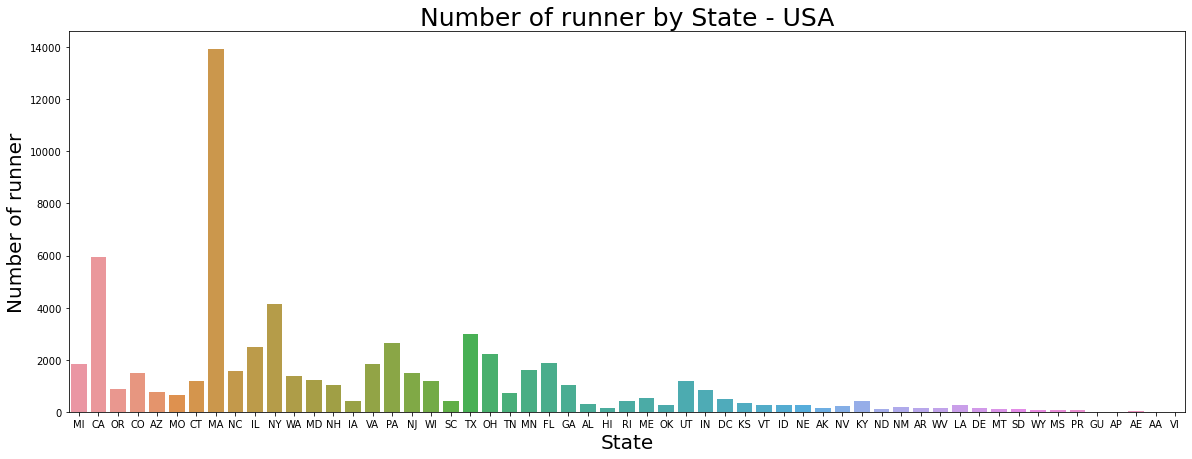

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# column 그래프 그리기(필수)
plt.figure(figsize=(20, 7))                                # 그래프 크기
runner_state = sns.countplot('State', data=USA_runner)      # 그래프 함수 : sns.countplot() 사용 / 

#seaborn에 countplot메소드 State로 카운트를 한다라는 뜻

# column 그래프 부가 설명(옵션)
runner_state.set_title('Number of runner by State - USA', fontsize=25)   # 제목
runner_state.set_xlabel('State', fontdict={'size':20})                   # x축 이름
runner_state.set_ylabel('Number of runner', fontdict={'size':20})        # y축 이름
plt.show()

### -> MA주가 가장 참가자 수가 많다. 남/녀 누가 더 많이 참가했을까?

### (2) State, Gender 별 runner 수

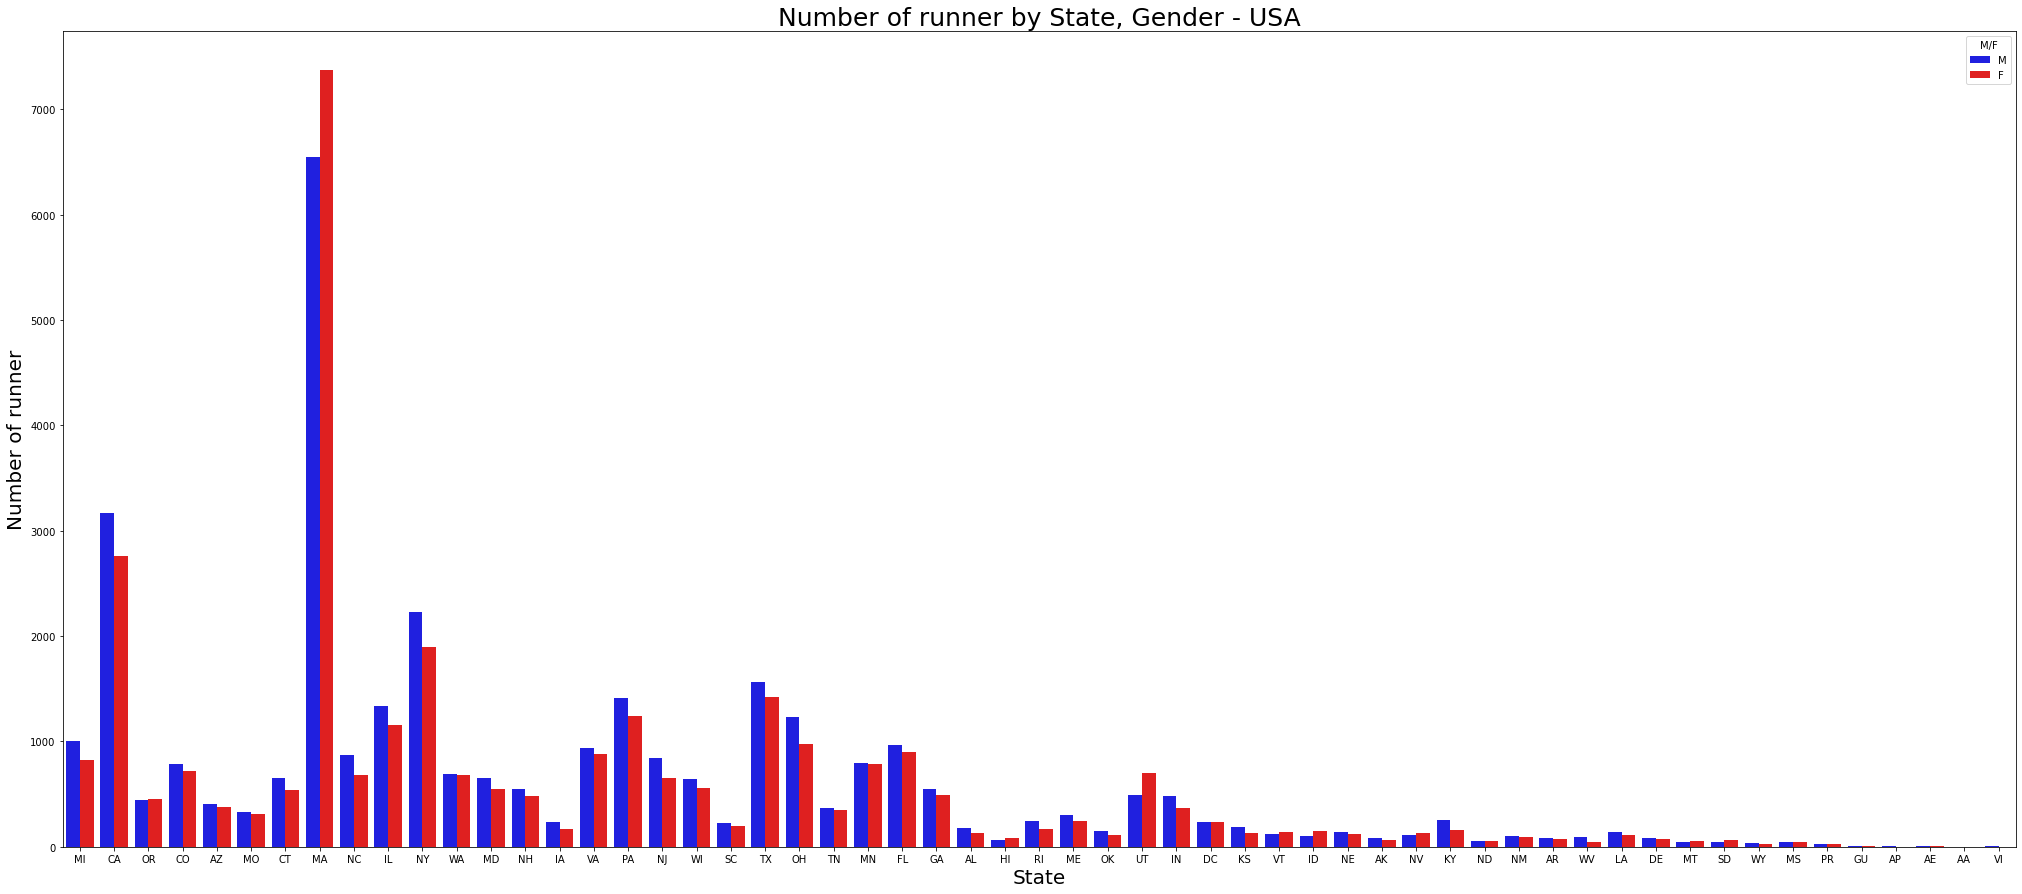

In [24]:
# column 그래프 그리기(필수)
plt.figure(figsize=(35, 15))    # 그래프 크기
# hue를 'M/F'로 주자
runner_state = sns.countplot('State', data=USA_runner, hue='M/F', palette={'F':'r', 'M':'b'})  # 그래프 함수 : sns.countplot() 사용
                                                      # hue : 칼럼명 기준으로 데이터 분해 해줌(값 기준으로 분해)
# column 그래프 부가 설명(옵션)
runner_state.set_title('Number of runner by State, Gender - USA', fontsize=25)   # 제목
runner_state.set_xlabel('State', fontdict={'size':20})                   # x축 이름
runner_state.set_ylabel('Number of runner', fontdict={'size':20})        # y축 이름
plt.show()

### -> MA주는 여성들의 참여가 더 높다

### 년도별로 참가자 수를 보고 싶으면?

### (3) 년도별 runner 수

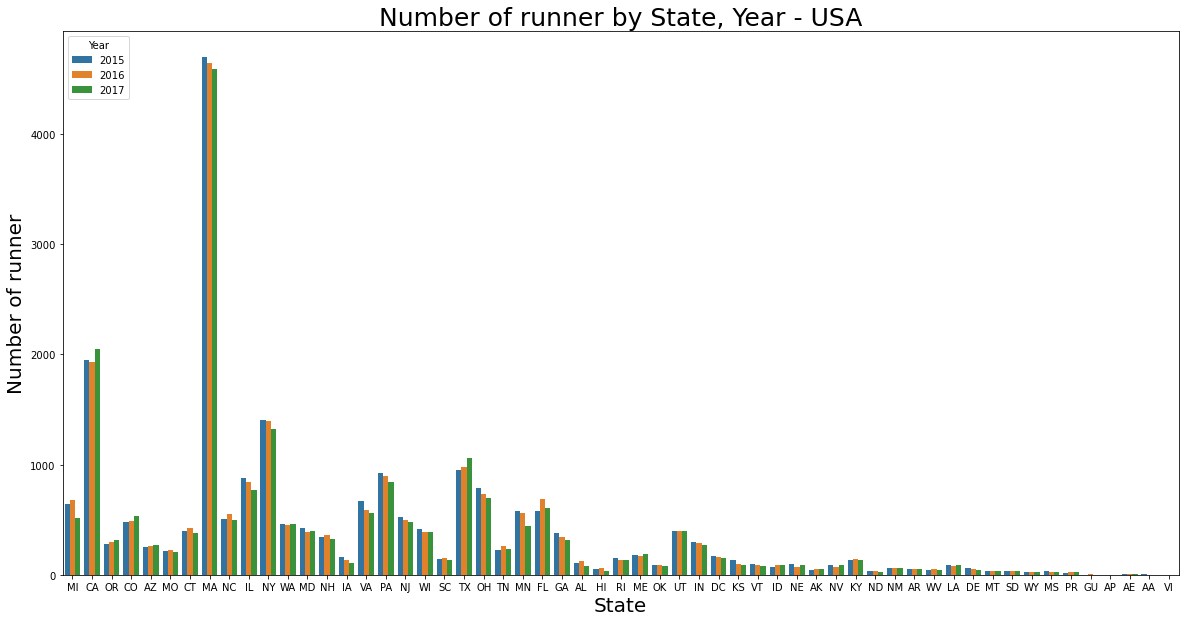

In [25]:
# column 그래프 그리기(필수)
plt.figure(figsize=(20, 10))    # 그래프 크기
# hue를 'Year'로 주자
runner_state = sns.countplot('State', data=USA_runner, hue='Year')  # 그래프 함수 : sns.countplot() 사용
                                                      # hue : 칼럼명 기준으로 데이터 분해 해줌
# column 그래프 부가 설명(옵션)
runner_state.set_title('Number of runner by State, Year - USA', fontsize=25)   # 제목
runner_state.set_xlabel('State', fontdict={'size':20})                   # x축 이름
runner_state.set_ylabel('Number of runner', fontdict={'size':20})        # y축 이름
plt.show()

### -> MA 주는 가장 참여자가 많은 주인데 매년 참가자 수가 줄고 있다. CA 주는 올해 참가자 수가 증가한 것으로 봐서 캠페인을 잘 한 것 같다.

# 2. Dual Axis, 파레토 차트

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

marathon_2015_2017 = pd.read_csv('data/marathon_2015_2017.csv')

In [61]:
#### 18세~59세 데이터만 가져오기 : isin()
runner_18_59 = marathon_2015_2017[marathon_2015_2017.Age.isin(range(18, 60))]
print(runner_18_59)

                        Name  Age M/F          City State Country    5K   10K  \
0             Desisa, Lelisa   25   M          Ambo   NaN     ETH   883  1783   
1      Tsegay, Yemane Adhane   30   M   Addis Ababa   NaN     ETH   883  1783   
2             Chebet, Wilson   29   M      Marakwet   NaN     KEN   883  1783   
3           Kipyego, Bernard   28   M       Eldoret   NaN     KEN   883  1784   
4              Korir, Wesley   32   M        Kitale   NaN     KEN   883  1784   
...                      ...  ...  ..           ...   ...     ...   ...   ...   
79631       Leroy, Stefan M.   25   M       Jupiter    FL     USA  2398  5153   
79632         Quinn, Adam H.   19   M       Belmont    MI     USA  2114  4233   
79634     Avelino, Andrew R.   25   M  Fayetteville    NC     USA  1923  3933   
79635        Hantel, Johanna   57   F       Malvern    PA     USA  3191  6216   
79637          Rigsby, Scott   48   M    Alpharetta    GA     USA  2376  4632   

        15K    20K  ...    

In [62]:
#### 18~59세 나이대별로 카운트 : value_counts()
runner_18_59_counting = runner_18_59.Age.value_counts()
runner_18_59_counting

45    3236
46    3039
40    2734
47    2566
50    2498
41    2494
35    2327
42    2318
48    2277
43    2265
36    2188
38    2128
51    2124
37    2108
39    2101
44    2056
49    2018
52    1930
55    1920
29    1906
30    1849
33    1834
31    1779
28    1758
34    1756
27    1755
53    1730
32    1726
26    1709
25    1539
56    1514
54    1433
24    1301
57    1287
58    1044
23     920
59     788
22     701
21     489
20     264
19     137
18      62
Name: Age, dtype: int64

#### x축 : Age 나열

In [63]:
# X축 값에 나이대 설정
x = runner_18_59_counting.index

print(type(x[0]))
print(x)

<class 'numpy.int64'>
Int64Index([45, 46, 40, 47, 50, 41, 35, 42, 48, 43, 36, 38, 51, 37, 39, 44, 49,
            52, 55, 29, 30, 33, 31, 28, 34, 27, 53, 32, 26, 25, 56, 54, 24, 57,
            58, 23, 59, 22, 21, 20, 19, 18],
           dtype='int64')


In [64]:
# int값을 str 값으로 바꾸기
x = [str(i) for i in x]
print(type(x[0]))
print(x)

<class 'str'>
['45', '46', '40', '47', '50', '41', '35', '42', '48', '43', '36', '38', '51', '37', '39', '44', '49', '52', '55', '29', '30', '33', '31', '28', '34', '27', '53', '32', '26', '25', '56', '54', '24', '57', '58', '23', '59', '22', '21', '20', '19', '18']


#### y축 : 값 나열

In [65]:
y = runner_18_59_counting.values
print(type(y[0]))
print(y)

<class 'numpy.int64'>
[3236 3039 2734 2566 2498 2494 2327 2318 2277 2265 2188 2128 2124 2108
 2101 2056 2018 1930 1920 1906 1849 1834 1779 1758 1756 1755 1730 1726
 1709 1539 1514 1433 1301 1287 1044  920  788  701  489  264  137   62]


In [66]:
ratio = y/y.sum()
ratio

array([0.04396261, 0.04128627, 0.0371427 , 0.03486034, 0.03393653,
       0.03388219, 0.03161341, 0.03149114, 0.03093414, 0.03077111,
       0.02972503, 0.0289099 , 0.02885556, 0.02863819, 0.02854309,
       0.02793175, 0.0274155 , 0.02621998, 0.02608412, 0.02589392,
       0.02511955, 0.02491577, 0.02416857, 0.02388327, 0.0238561 ,
       0.02384252, 0.02350288, 0.02344854, 0.02321759, 0.02090805,
       0.02056842, 0.01946799, 0.01767471, 0.01748451, 0.01418324,
       0.01249864, 0.01070536, 0.00952342, 0.0066433 , 0.00358657,
       0.00186121, 0.0008423 ])

In [67]:
# 누적데이터 보여주는 함수 : cumsum()
ratio_sum = ratio.cumsum()
ratio_sum

array([0.04396261, 0.08524889, 0.12239159, 0.15725193, 0.19118846,
       0.22507064, 0.25668406, 0.2881752 , 0.31910934, 0.34988045,
       0.37960548, 0.40851538, 0.43737094, 0.46600913, 0.49455222,
       0.52248397, 0.54989947, 0.57611944, 0.60220356, 0.62809749,
       0.65321704, 0.67813281, 0.70230138, 0.72618465, 0.75004076,
       0.77388327, 0.79738615, 0.82083469, 0.84405228, 0.86496033,
       0.88552875, 0.90499674, 0.92267145, 0.94015596, 0.9543392 ,
       0.96683784, 0.9775432 , 0.98706662, 0.99370992, 0.99729649,
       0.9991577 , 1.        ])

### 그래프 그리기

In [60]:
# plt.subplots() 참고
# https://m.blog.naver.com/PostView.nhn?blogId=heygun&logNo=221520454294&proxyReferer=https:%2F%2Fwww.google.com%2F

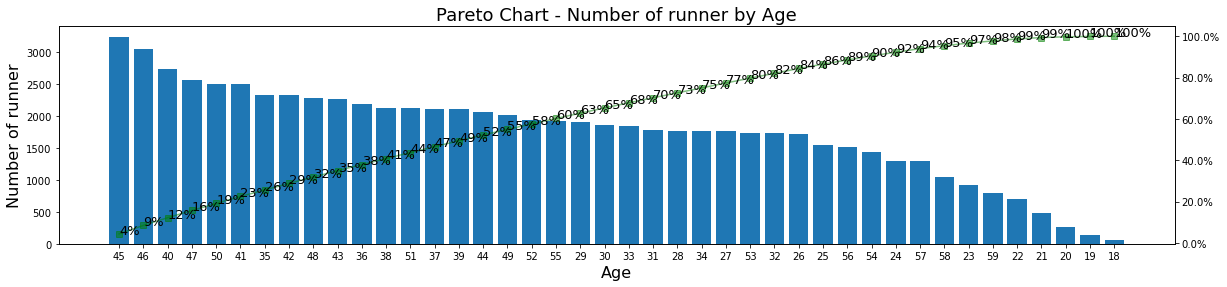

In [68]:
# figsize 지정
fig, barChart = plt.subplots(figsize=(20,4))

# bar chart에 x, y값 넣어서 bar chart 생성
barChart.bar(x, y)

# line chart 생성
lineChart = barChart.twinx()  # twinx() : 두 개의 차트가 서로 다른 y 축, 공통 x 축을 사용하게 해줌
lineChart.plot(x, ratio_sum, '-gs', alpha = 0.5)  # alpha:투명도 # -ro = red o 동그라미 선 s = squre ,>세모같은거

######## ------- 잘라서 보여주기 -------- ########

# 오른쪽 축(라인 차트 축) 레이블
#리스트안에 반복문을 쓴 것 , 리스트 컴프리헨션 ranges = .1%는 소수점1쨰짜리까지 보여주는것 , format(x) 문자열 포메팅
ranges = lineChart.get_yticks() # y차트의 단위들
lineChart.set_yticklabels(['{0:.1%}'.format(x) for x in ranges]) 

# 라인차트 데이터 별 %값 주석(annotation)
ratio_sum_percentages = ['{0:.0%}'.format(x) for x in ratio_sum]
for i, txt in enumerate(ratio_sum_percentages):
    lineChart.annotate(txt, (x[i], ratio_sum[i]), fontsize=13)

# x, y label (이름) 만들기
barChart.set_xlabel('Age', fontdict={'size':16})
barChart.set_ylabel('Number of runner', fontdict={'size':16})

# plot에 title(제목) 만들기
plt.title('Pareto Chart - Number of runner by Age', fontsize=18)

plt.show()

### -> 파레토 차트로 직관적으로 상위 n%를 확인할 수 있다

### part2. 나이 순서대로 정렬해서 그래프 그리기

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

marathon_2015_2017 = pd.read_csv('data/marathon_2015_2017.csv')
#### 18세~59세 데이터만 가져오기 : isin() : 컬럼에서 어떤 특정 값을 포함하고 있는것만 걸러낼 때
runner_18_59 = marathon_2015_2017[marathon_2015_2017.Age.isin(range(18, 60))]
# print(runner_18_59)

#### 18~59세 나이대별로 카운트 : value_counts()
runner_18_59_counting = runner_18_59.Age.value_counts()
# print(runner_18_59_counting)

#### 나이와 참가자 수 각각 데이터프레임에 칼럼 추가 -> Age를 이용한 sort 가능

In [70]:
runner_age = pd.DataFrame({
    'Age': runner_18_59_counting.index,
    'Count': runner_18_59_counting
})
print(runner_age)

    Age  Count
45   45   3236
46   46   3039
40   40   2734
47   47   2566
50   50   2498
41   41   2494
35   35   2327
42   42   2318
48   48   2277
43   43   2265
36   36   2188
38   38   2128
51   51   2124
37   37   2108
39   39   2101
44   44   2056
49   49   2018
52   52   1930
55   55   1920
29   29   1906
30   30   1849
33   33   1834
31   31   1779
28   28   1758
34   34   1756
27   27   1755
53   53   1730
32   32   1726
26   26   1709
25   25   1539
56   56   1514
54   54   1433
24   24   1301
57   57   1287
58   58   1044
23   23    920
59   59    788
22   22    701
21   21    489
20   20    264
19   19    137
18   18     62


In [71]:
runner_age_sort = runner_age.sort_values(by='Age')
runner_age_sort

,Age,Count
18,18,62
19,19,137
20,20,264
21,21,489
22,22,701
23,23,920
24,24,1301
25,25,1539
26,26,1709
27,27,1755


In [72]:
# runner_age_sort 값 기준
x = runner_age_sort.index
# int값을 str 값으로 바꾸기
x = [str(i) for i in x]

# y값도 변경
y = runner_age_sort['Count']

In [73]:
# 누적데이터 보여주는 함수 : cumsum()
ratio = y/y.sum()
ratio_sum = ratio.cumsum()
print(ratio_sum)

# y 누적값을 리스트 형식으로 바꿔주기
y_ratio = [i for i in ratio_sum]
print(y_ratio)

18    0.000842
19    0.002704
20    0.006290
21    0.012933
22    0.022457
23    0.034955
24    0.052630
25    0.073538
26    0.096756
27    0.120598
28    0.144482
29    0.170376
30    0.195495
31    0.219664
32    0.243112
33    0.268028
34    0.291884
35    0.323497
36    0.353222
37    0.381861
38    0.410771
39    0.439314
40    0.476456
41    0.510339
42    0.541830
43    0.572601
44    0.600533
45    0.644495
46    0.685781
47    0.720642
48    0.751576
49    0.778991
50    0.812928
51    0.841784
52    0.868003
53    0.891506
54    0.910974
55    0.937058
56    0.957627
57    0.975111
58    0.989295
59    1.000000
Name: Count, dtype: float64
[0.0008422997500271709, 0.0027035104879904355, 0.0062900771655254855, 0.012933376806868818, 0.02245679817411151, 0.0349554396261276, 0.05263014889685904, 0.07353820236930769, 0.09675578741441149, 0.12059830453211609, 0.14448157808933815, 0.17037550266275409, 0.19549505488533858, 0.21966362351918273, 0.24311216172155203, 0.2680279317465493, 

In [74]:
# plt.subplots() 참고
# https://m.blog.naver.com/PostView.nhn?blogId=heygun&logNo=221520454294&proxyReferer=https:%2F%2Fwww.google.com%2F

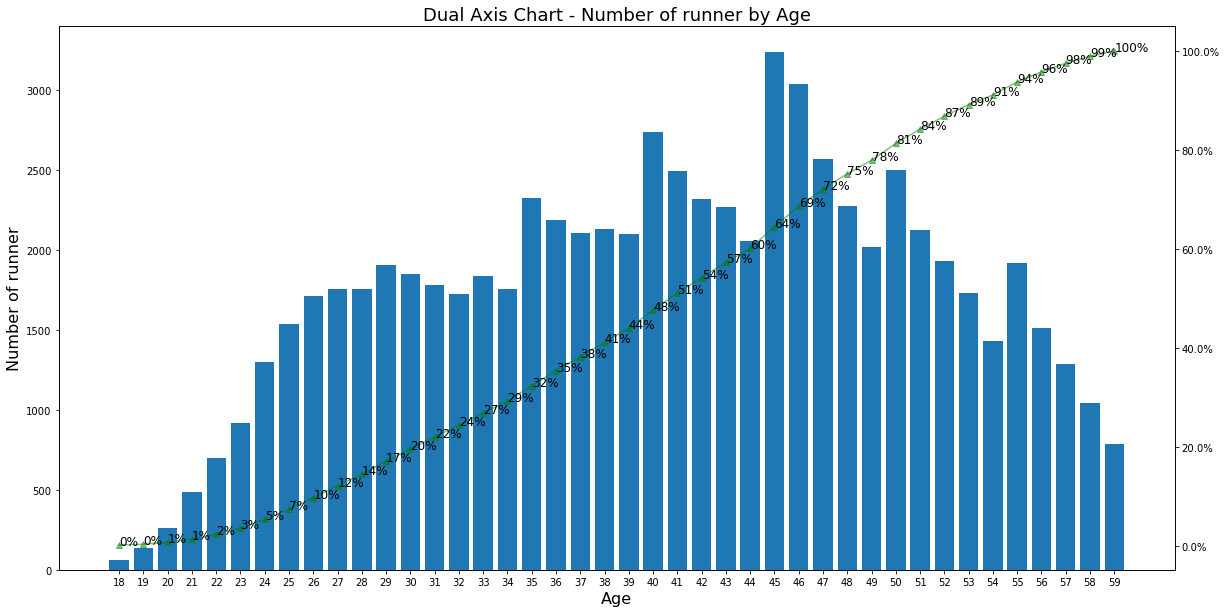

In [75]:
# 데이터 그리기

# figsize 지정
fig, barChart = plt.subplots(figsize=(20,10))

# bar chart에 x, y값 넣어서 bar chart 생성
barChart.bar(x, y)

# line chart 생성
lineChart = barChart.twinx()  # twinx() : 두 개의 차트가 서로 다른 y 축, 공통 x 축을 사용하게 해줌
lineChart.plot(x, ratio_sum, '-g^', alpha = 0.5)  # alpha:투명도

# 오른쪽 축(라인 차트 축) 레이블
ranges = lineChart.get_yticks() # y차트의 단위들
lineChart.set_yticklabels(['{0:.1%}'.format(x) for x in ranges])

# 라인차트 데이터 별 %값 주석(annotation)
ratio_sum_percentages = ['{0:.0%}'.format(x) for x in ratio_sum]
for i, txt in enumerate(ratio_sum_percentages):
    lineChart.annotate(txt, (x[i], y_ratio[i]), fontsize=12)  #변경된 부분: ratio_sum -> y_ratio

# x, y label, title 만들기
barChart.set_xlabel('Age', fontdict={'size':16})
barChart.set_ylabel('Number of runner', fontdict={'size':16})
plt.title('Dual Axis Chart - Number of runner by Age', fontsize=18)  # 제목 변경(dual axis chart)

# show plot
plt.show()

# 3. Pie chart

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

marathon_2015_2017 = pd.read_csv('data/marathon_2015_2017.csv')

In [77]:
# 라벨 지정
# 튜플 : 리스트와 유사하지만 값 수정이 안된다
labels = 'Male', 'Female'
labels

('Male', 'Female')

In [92]:
# 차트를 입체적으로 보이게(음영)
explode = (0,0.1)

In [93]:
marathon_2015_2017.columns

Index(['Name', 'Age', 'M/F', 'City', 'State', 'Country', '5K', '10K', '15K',
       '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time',
       'Overall', 'Gender', 'Division', 'Year'],
      dtype='object')

In [94]:
marathon_2015_2017['M/F'].value_counts()

M    43482
F    36156
Name: M/F, dtype: int64

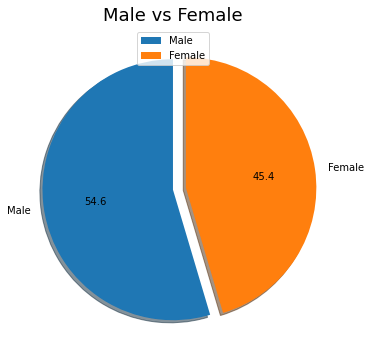

In [99]:
plt.figure(figsize=(6,6))

# pie chart 만들기(차트 띄우기, labels 달기, 각 조정, 그림자, 값 소숫점 표시)
plt.pie(marathon_2015_2017['M/F'].value_counts(), explode=explode, labels=labels, startangle=90, shadow=True, autopct='%.1f')

# 라벨, 타이틀 달기
plt.title('Male vs Female', fontsize=18)

# 레전드(범례) 달기
plt.legend(['Male', 'Female'], loc='upper center')

plt.show()

# 4. Line chart(시계열 , 연도별 , 순서나열 등)

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

marathon_2015_2017.head(3)

,Name,Age,M/F,City,State,Country,5K,10K,15K,20K,...,25K,30K,35K,40K,Pace,Official Time,Overall,Gender,Division,Year
0,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,883,1783,2697,3629,...,4567,5520,6479,7359,296,7757,1,1,1,2015
1,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,883,1783,2698,3628,...,4567,5519,6479,7362,298,7788,2,2,2,2015
2,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,883,1783,2697,3629,...,4567,5520,6479,7381,299,7822,3,3,3,2015


### 필요한 칼럼만 가져와서 데이터프레임으로 만들기

In [101]:
#pd.DataFrame = 데이터 프레임을 만들어라 라는 명령어 . 우리가 원하는 칼럼과 데이터만 선택해다시 만듬. 
#sort_values(by=['칼럼명']) : 칼러명 기준으로 정렬.
record = pd.DataFrame(marathon_2015_2017, columns=['5K','10K','15K','20K','Half','25K','30K','35K','40K','Official Time']).sort_values(by=['Official Time'])

In [102]:
record.head()

,5K,10K,15K,20K,Half,25K,30K,35K,40K,Official Time
0,883,1783,2697,3629,3842,4567,5520,6479,7359,7757
53228,925,1828,2744,3675,3875,4619,5581,6499,7373,7777
1,883,1783,2698,3628,3841,4567,5519,6479,7362,7788
53229,924,1827,2744,3675,3875,4619,5581,6499,7394,7798
2,883,1783,2697,3629,3842,4567,5520,6479,7381,7822


#### 칼럼 추가하기 : insert()

In [112]:
range(1, len(record)+1)

range(1, 79639)

In [113]:
#레코드 데이터프레임에 인서트 함수 , 0번째 , Rank , range 1,len(record)+1
record.insert(0, 'Rank', range(1, len(record)+1))

In [114]:
record.head()

,Rank,5K,10K,15K,20K,Half,25K,30K,35K,40K,Official Time
0,1,883,1783,2697,3629,3842,4567,5520,6479,7359,7757
53228,2,925,1828,2744,3675,3875,4619,5581,6499,7373,7777
1,3,883,1783,2698,3628,3841,4567,5519,6479,7362,7788
53229,4,924,1827,2744,3675,3875,4619,5581,6499,7394,7798
2,5,883,1783,2697,3629,3842,4567,5520,6479,7381,7822


### 100등까지만 가져오기

In [115]:
top100 = record[0:100]
top100

,Rank,5K,10K,15K,20K,Half,25K,30K,35K,40K,Official Time
0,1,883,1783,2697,3629,3842,4567,5520,6479,7359,7757
53228,2,925,1828,2744,3675,3875,4619,5581,6499,7373,7777
1,3,883,1783,2698,3628,3841,4567,5519,6479,7362,7788
53229,4,924,1827,2744,3675,3875,4619,5581,6499,7394,7798
2,5,883,1783,2697,3629,3842,4567,5520,6479,7381,7822
...,...,...,...,...,...,...,...,...,...,...,...
41,96,1006,2023,3046,4063,4286,5092,6133,7181,8216,8747
40,97,890,1824,2821,3828,4043,4822,5864,6967,8155,8747
42,98,959,1952,2985,4015,4246,5061,6120,7197,8273,8758
53265,99,998,2007,3015,4044,4269,5075,6134,7219,8286,8760


In [116]:
xData = top100.Rank
xData

0          1
53228      2
1          3
53229      4
2          5
        ... 
41        96
40        97
42        98
53265     99
43       100
Name: Rank, Length: 100, dtype: int32

In [117]:
yData_full = top100['Official Time']
yData_10K = top100['10K']
yData_20K = top100['20K']
yData_30K = top100['30K']

### Line chart 그리기

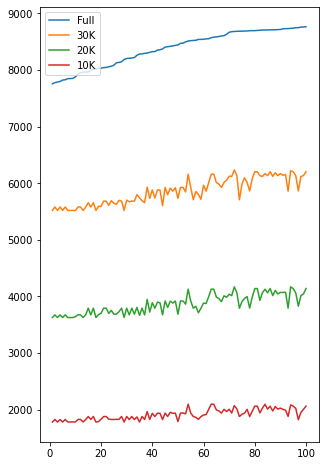

In [122]:
plt.figure(figsize=(5, 8))

plt.plot(xData, yData_full)
plt.plot(xData, yData_30K)
plt.plot(xData, yData_20K)
plt.plot(xData, yData_10K)

# 레전드 달기
plt.legend(['Full', '30K', '20K', '10K'], loc='upper left')

plt.show()

# 5. Scatter chart (산포도)

In [127]:
marathon_2015_2017 = pd.read_csv('data/marathon_2015_2017.csv')

In [128]:
marathon_2015_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79638 entries, 0 to 79637
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           79638 non-null  object
 1   Age            79638 non-null  int64 
 2   M/F            79638 non-null  object
 3   City           79637 non-null  object
 4   State          70645 non-null  object
 5   Country        79638 non-null  object
 6   5K             79638 non-null  int64 
 7   10K            79638 non-null  int64 
 8   15K            79638 non-null  int64 
 9   20K            79638 non-null  int64 
 10  Half           79638 non-null  int64 
 11  25K            79638 non-null  int64 
 12  30K            79638 non-null  int64 
 13  35K            79638 non-null  int64 
 14  40K            79638 non-null  int64 
 15  Pace           79638 non-null  int64 
 16  Official Time  79638 non-null  int64 
 17  Overall        79638 non-null  int64 
 18  Gender         79638 non-n

In [132]:
marathon_2015_2017['M/F']

0        M
1        M
2        M
3        M
4        M
        ..
79633    F
79634    M
79635    F
79636    M
79637    M
Name: M/F, Length: 79638, dtype: object

In [133]:
#조건걸어서 데이터 찍어보기 . 
MALE_runner = marathon_2015_2017[marathon_2015_2017['M/F']=='M'] #남자의 데이터 변수설정
FEMALE_runner = marathon_2015_2017[marathon_2015_2017['M/F']=='F'] #여자의 데이터만 변수설정

In [137]:
print(len(MALE_runner))
print(len(FEMALE_runner))

43482
36156


In [138]:
FEMALE_runner.head()

,Name,Age,M/F,City,State,Country,5K,10K,15K,20K,...,25K,30K,35K,40K,Pace,Official Time,Overall,Gender,Division,Year
30,"Rotich, Caroline",30,F,Nyahururu,NaN,KEN,1019,2064,3109,4140,...,5168,6204,7250,8250,332,8695,31,1,1,2015
31,"Dibaba, Mare",25,F,Shoa,NaN,ETH,1018,2063,3108,4140,...,5168,6203,7250,8250,332,8699,32,2,2,2015
33,"Deba, Buzunesh",27,F,Arsi,NaN,ETH,1017,2063,3109,4141,...,5169,6204,7250,8250,333,8709,34,3,3,2015
39,"Linden, Desiree",31,F,Rochester Mills,MI,USA,1020,2064,3108,4140,...,5168,6203,7249,8271,334,8739,40,4,4,2015
43,"Cherop, Sharon",31,F,Marakwet,NaN,KEN,1019,2064,3109,4141,...,5169,6204,7250,8282,335,8765,44,5,5,2015


In [139]:
#남자 나이 , 경기기록 변수명 설정
x_male = MALE_runner.Age
y_male = MALE_runner['Official Time']
#여자 나이 , 경기기록 변수명 설정
x_female = FEMALE_runner.Age
y_female = FEMALE_runner['Official Time']

In [140]:
y_female

30        8695
31        8699
33        8709
39        8739
43        8765
         ...  
79613    22564
79624    23905
79627    24390
79633    25779
79635    26377
Name: Official Time, Length: 36156, dtype: int64

### Scatter chart 그리기

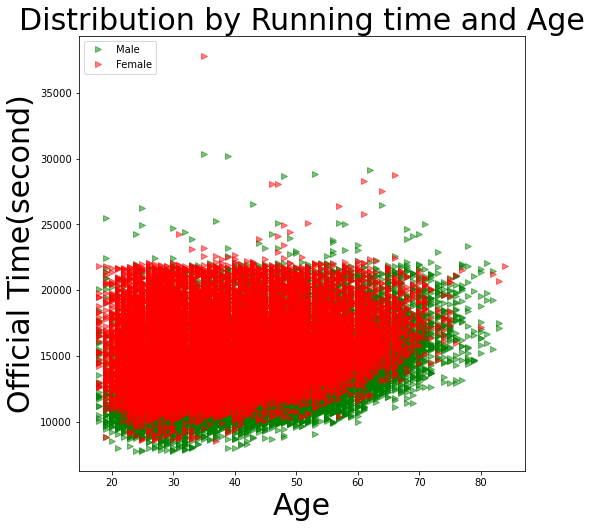

In [149]:
# figure size 지정
plt.figure(figsize=(8, 8))

plt.plot(x_male, y_male, '>', color='g', alpha=0.5)
plt.plot(x_female, y_female, '>', color='r', alpha=0.5)

# label과 title 정하기
plt.xlabel('Age', fontsize=30)
plt.ylabel('Official Time(second)', fontsize=30)
plt.title('Distribution by Running time and Age', fontsize=30)

plt.legend(['Male', 'Female'], loc='upper left')

plt.show()

# 6. Bubble chart(그룹을 지어서 보여주기 좋음)

In [150]:
pwd

'C:\\Users\\USER\\Desktop\\아카이브\\마라톤데이터_ch2.시각화'

In [152]:
marathon_results_2017 = pd.read_csv('data/marathon_results_2017.csv')

In [153]:
marathon_results_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26410 entries, 0 to 26409
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     26410 non-null  int64 
 1   Bib            26410 non-null  object
 2   Name           26410 non-null  object
 3   Age            26410 non-null  int64 
 4   M/F            26410 non-null  object
 5   City           26410 non-null  object
 6   State          22815 non-null  object
 7   Country        26410 non-null  object
 8   Citizen        1254 non-null   object
 9   Unnamed: 9     91 non-null     object
 10  5K             26410 non-null  object
 11  10K            26410 non-null  object
 12  15K            26410 non-null  object
 13  20K            26410 non-null  object
 14  Half           26410 non-null  object
 15  25K            26410 non-null  object
 16  30K            26410 non-null  object
 17  35K            26410 non-null  object
 18  40K            26410 non-n

In [154]:
marathon_2017 = marathon_results_2017.drop(['Unnamed: 0', 'Bib', 'Citizen', 'Unnamed: 9', 'Proj Time'], axis='columns')

In [155]:
marathon_2017.head()

,Name,Age,M/F,City,State,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Overall,Gender,Division
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,0:15:25,0:30:28,0:45:44,1:01:15,1:04:35,1:16:59,1:33:01,1:48:19,2:02:53,0:04:57,2:09:37,1,1,1
1,"Rupp, Galen",30,M,Portland,OR,USA,0:15:24,0:30:27,0:45:44,1:01:15,1:04:35,1:16:59,1:33:01,1:48:19,2:03:14,0:04:58,2:09:58,2,2,2
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,0:15:25,0:30:29,0:45:44,1:01:16,1:04:36,1:17:00,1:33:01,1:48:31,2:03:38,0:04:59,2:10:28,3,3,3
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,0:15:25,0:30:29,0:45:44,1:01:19,1:04:45,1:17:00,1:33:01,1:48:58,2:04:35,0:05:03,2:12:08,4,4,4
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,0:15:25,0:30:28,0:45:44,1:01:15,1:04:35,1:16:59,1:33:01,1:48:41,2:05:00,0:05:04,2:12:35,5,5,5


### 초 단위로 바꾸기 :  to_timedelta


In [156]:
# pd.to_timedelt() 적용하기
# .astype('m8[s]').astype(np.int64) 적용하기
# -> 초단위로 바꾼 후, int 형태로 변환
marathon_2017['5K'] = pd.to_timedelta(marathon_2017['5K']).astype('m8[s]').astype(np.int64)
marathon_2017['10K'] = pd.to_timedelta(marathon_2017['10K']).astype('m8[s]').astype(np.int64)
marathon_2017['15K'] = pd.to_timedelta(marathon_2017['15K']).astype('m8[s]').astype(np.int64)
marathon_2017['20K'] = pd.to_timedelta(marathon_2017['20K']).astype('m8[s]').astype(np.int64)
marathon_2017['Half'] = pd.to_timedelta(marathon_2017['Half']).astype('m8[s]').astype(np.int64)
marathon_2017['25K'] = pd.to_timedelta(marathon_2017['25K']).astype('m8[s]').astype(np.int64)
marathon_2017['30K'] = pd.to_timedelta(marathon_2017['30K']).astype('m8[s]').astype(np.int64)
marathon_2017['35K'] = pd.to_timedelta(marathon_2017['35K']).astype('m8[s]').astype(np.int64)
marathon_2017['40K'] = pd.to_timedelta(marathon_2017['40K']).astype('m8[s]').astype(np.int64)
marathon_2017['Pace'] = pd.to_timedelta(marathon_2017['Pace']).astype('m8[s]').astype(np.int64)
marathon_2017['Official Time'] = pd.to_timedelta(marathon_2017['Official Time']).astype('m8[s]').astype(np.int64)

In [157]:
marathon_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26410 entries, 0 to 26409
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           26410 non-null  object
 1   Age            26410 non-null  int64 
 2   M/F            26410 non-null  object
 3   City           26410 non-null  object
 4   State          22815 non-null  object
 5   Country        26410 non-null  object
 6   5K             26410 non-null  int64 
 7   10K            26410 non-null  int64 
 8   15K            26410 non-null  int64 
 9   20K            26410 non-null  int64 
 10  Half           26410 non-null  int64 
 11  25K            26410 non-null  int64 
 12  30K            26410 non-null  int64 
 13  35K            26410 non-null  int64 
 14  40K            26410 non-null  int64 
 15  Pace           26410 non-null  int64 
 16  Official Time  26410 non-null  int64 
 17  Overall        26410 non-null  int64 
 18  Gender         26410 non-n

In [158]:
marathon_2017.head()

,Name,Age,M/F,City,State,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Overall,Gender,Division
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,925,1828,2744,3675,3875,4619,5581,6499,7373,297,7777,1,1,1
1,"Rupp, Galen",30,M,Portland,OR,USA,924,1827,2744,3675,3875,4619,5581,6499,7394,298,7798,2,2,2
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,925,1829,2744,3676,3876,4620,5581,6511,7418,299,7828,3,3,3
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,925,1829,2744,3679,3885,4620,5581,6538,7475,303,7928,4,4,4
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,925,1828,2744,3675,3875,4619,5581,6521,7500,304,7955,5,5,5


In [159]:
check_time = 7200    # 2시간
Lat = 0
Long = 0
Location = ''

# 5K, 10K, 15K, 20K, 25K, 30K, 35K, 40K
points = [[42.247835,-71.474357], [42.274032,-71.423979], [42.282364,-71.364801], [42.297870,-71.284260],
          [42.324830,-71.259660], [42.345680,-71.215169], [42.352089,-71.124947], [42.351510,-71.086980]]

In [160]:
marathon_location = pd.DataFrame(columns=['Lat','Long'])

In [161]:
# iterrows() : 각각의 행을 돌아라는 뜻
marathon_2017.iterrows()

<generator object DataFrame.iterrows at 0x00000210BB5DD200>

In [162]:
# 26000개 행을 돌면서 위치가 어디인지 판단한다.
# iterrows() : 각각의 행을 돌아라는 뜻
for index, record in marathon_2017.iterrows():
    if (record['40K'] < check_time):
        Lat = points[7][0]
        Long = points[7][1]
    elif (record['35K'] < check_time):
        Lat = points[6][0]
        Long = points[6][1]
    elif (record['30K'] < check_time):
        Lat = points[5][0]
        Long = points[5][1]
    elif (record['25K'] < check_time):
        Lat = points[4][0]
        Long = points[4][1]
    elif (record['20K'] < check_time):
        Lat = points[3][0]
        Long = points[3][1]
    elif (record['15K'] < check_time):
        Lat = points[2][0]
        Long = points[2][1]
    elif (record['10K'] < check_time):
        Lat = points[1][0]
        Long = points[1][1]
    elif (record['5K'] < check_time):
        Lat = points[0][0]
        Long = points[0][1]
    else:    
        Lat = points[0][0]
        Long = points[0][1]
    marathon_location = marathon_location.append({'Lat' : Lat, 'Long' : Long}, ignore_index=True)

In [113]:
print(len(marathon_location))
marathon_location

26410


,Lat,Long
0,42.352089,-71.124947
1,42.352089,-71.124947
2,42.352089,-71.124947
3,42.352089,-71.124947
4,42.352089,-71.124947
...,...,...
26405,42.274032,-71.423979
26406,42.282364,-71.364801
26407,42.297870,-71.284260
26408,42.274032,-71.423979


In [164]:
# 7개의 지점마다 몇명이 잇는지 .size() 함수로 알 수 있음.
marathon_location.groupby(['Lat', 'Long']).size()

Lat        Long      
42.274032  -71.423979       49
42.282364  -71.364801     4435
42.297870  -71.284260    13866
42.324830  -71.259660     7261
42.345680  -71.215169      737
42.351510  -71.086980        6
42.352089  -71.124947       56
dtype: int64

In [167]:
#rest_index 각 값들의 칼럼명을 지어준다.
marathon_count = marathon_location.groupby(['Lat', 'Long']).size().reset_index(name='Count')

In [168]:
marathon_count

,Lat,Long,Count
0,42.274032,-71.423979,49
1,42.282364,-71.364801,4435
2,42.297870,-71.284260,13866
3,42.324830,-71.259660,7261
4,42.345680,-71.215169,737
5,42.351510,-71.086980,6
6,42.352089,-71.124947,56


### -> 2시간 정도 지났을 때, 참가자들은 7개 정도 지역에 분포되어 있다.

## Bubble chart(지도) 그리기 : scatter chart의 응용버전

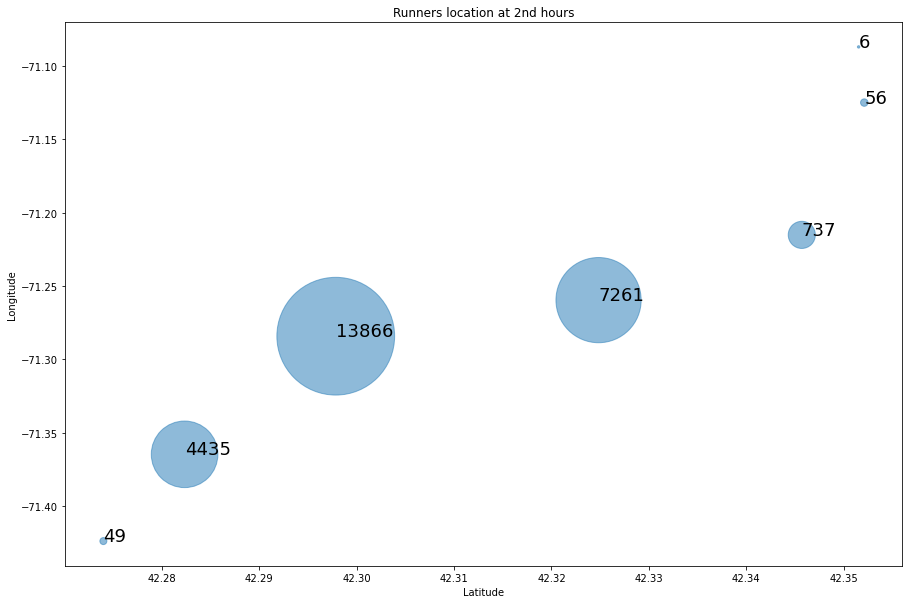

In [172]:
import matplotlib.pyplot as plt

# figure size 지정
plt.figure(figsize=(15, 10))

# scatter chart 적용
plt.scatter(marathon_count.Lat, marathon_count.Long, s=marathon_count.Count, alpha=0.5)

# 타이틀, 라벨 달기
plt.title('Runners location at 2nd hours')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# 위치 별 Count값 넣기
for i, txt in enumerate(marathon_count.Count):
    plt.annotate(txt, (marathon_count.Lat[i], marathon_count.Long[i]), fontsize=18)

plt.show()

# 7. Heat map

In [173]:
marathon_2015_2017 = pd.read_csv('data/marathon_2015_2017.csv')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [174]:
marathon_2015_2017_under60 = marathon_2015_2017[marathon_2015_2017.Age.isin(range(0,60))]

In [175]:
marathon_2015_2017_under60.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73608 entries, 0 to 79637
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           73608 non-null  object
 1   Age            73608 non-null  int64 
 2   M/F            73608 non-null  object
 3   City           73607 non-null  object
 4   State          65438 non-null  object
 5   Country        73608 non-null  object
 6   5K             73608 non-null  int64 
 7   10K            73608 non-null  int64 
 8   15K            73608 non-null  int64 
 9   20K            73608 non-null  int64 
 10  Half           73608 non-null  int64 
 11  25K            73608 non-null  int64 
 12  30K            73608 non-null  int64 
 13  35K            73608 non-null  int64 
 14  40K            73608 non-null  int64 
 15  Pace           73608 non-null  int64 
 16  Official Time  73608 non-null  int64 
 17  Overall        73608 non-null  int64 
 18  Gender         73608 non-n

In [176]:
marathon = marathon_2015_2017_under60.groupby('Age')['M/F'].value_counts().unstack().fillna(0)

In [177]:
marathon_2015_2017_under60.groupby('Age')['M/F'].value_counts()

Age  M/F
18   M       32
     F       30
19   F       70
     M       67
20   F      139
           ... 
57   F      387
58   M      741
     F      303
59   M      564
     F      224
Name: M/F, Length: 84, dtype: int64

In [126]:
marathon

M/F,F,M
Age,,
18,30,32
19,70,67
20,139,125
21,253,236
22,422,279
23,590,330
24,829,472
25,979,560
26,1060,649


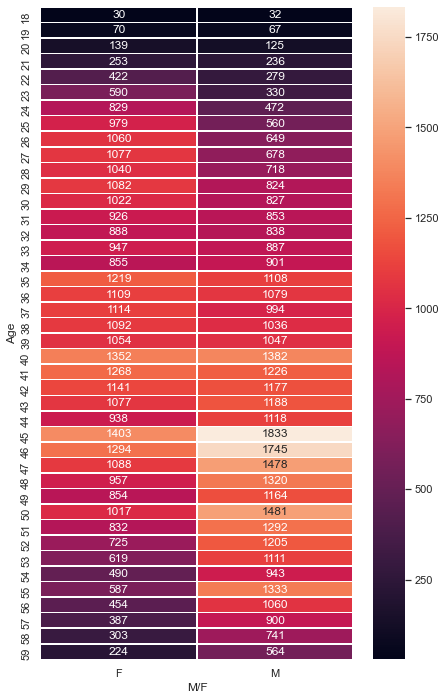

In [179]:
f, ax = plt.subplots(figsize=(7,12))
sns.heatmap(marathon, annot=True, fmt='d', linewidths=.5, ax=ax)  # cmap='Accent'

# 8. Histogram

In [1]:
# 208.py

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
marathon_2015_2017 = pd.read_csv('data/marathon_2015_2017.csv')

In [182]:
print(marathon_2015_2017.shape)
marathon_2015_2017.head(3)

(79638, 21)


,Name,Age,M/F,City,State,Country,5K,10K,15K,20K,...,25K,30K,35K,40K,Pace,Official Time,Overall,Gender,Division,Year
0,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,883,1783,2697,3629,...,4567,5520,6479,7359,296,7757,1,1,1,2015
1,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,883,1783,2698,3628,...,4567,5519,6479,7362,298,7788,2,2,2,2015
2,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,883,1783,2697,3629,...,4567,5520,6479,7381,299,7822,3,3,3,2015


### (1) 나이별 참가자 비율 분포 구하기 : seaborn의 distplot

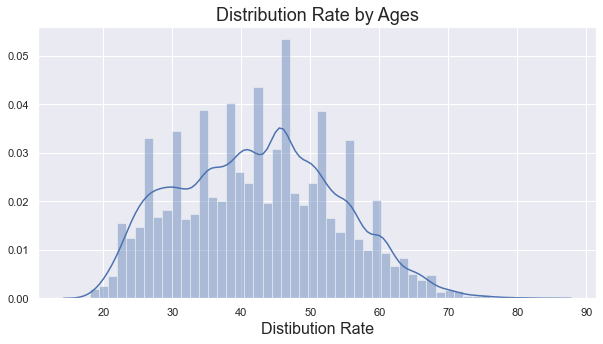

In [183]:
# figure size 지정
plt.figure(figsize = (10, 5))

# displot 함수로 분포 그리기
age_count = sns.distplot(marathon_2015_2017.Age)

# 제목, x라벨 ,y라벨 지정
age_count.set_title('Distribution Rate by Ages', fontsize=18)
age_count.set_xlabel('Ages', fontdict={'size':16})
age_count.set_xlabel('Distibution Rate', fontdict={'size':16})

plt.show()

### (2) 나이별 참가자 실제 수 그리기 : seaborn의 countplot

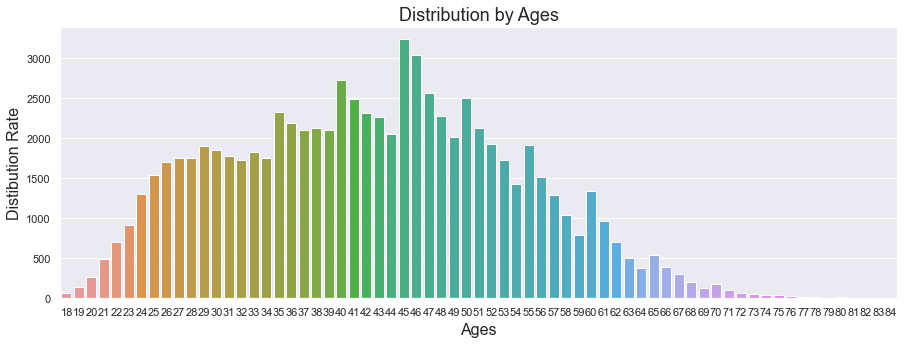

In [186]:
# figure size 지정
plt.figure(figsize = (15, 5))

# displot 함수로 분포 그리기
age_count = sns.countplot(marathon_2015_2017.Age)

# 제목, x라벨 ,y라벨 지정
age_count.set_title('Distribution by Ages', fontsize=18)
age_count.set_xlabel('Ages', fontdict={'size':16})
age_count.set_ylabel('Distibution Rate', fontdict={'size':16})

plt.show()

### (3) 카운트가 높은 연령 기준으로 실제 수 그리기 : 씨본의 countplot 응용

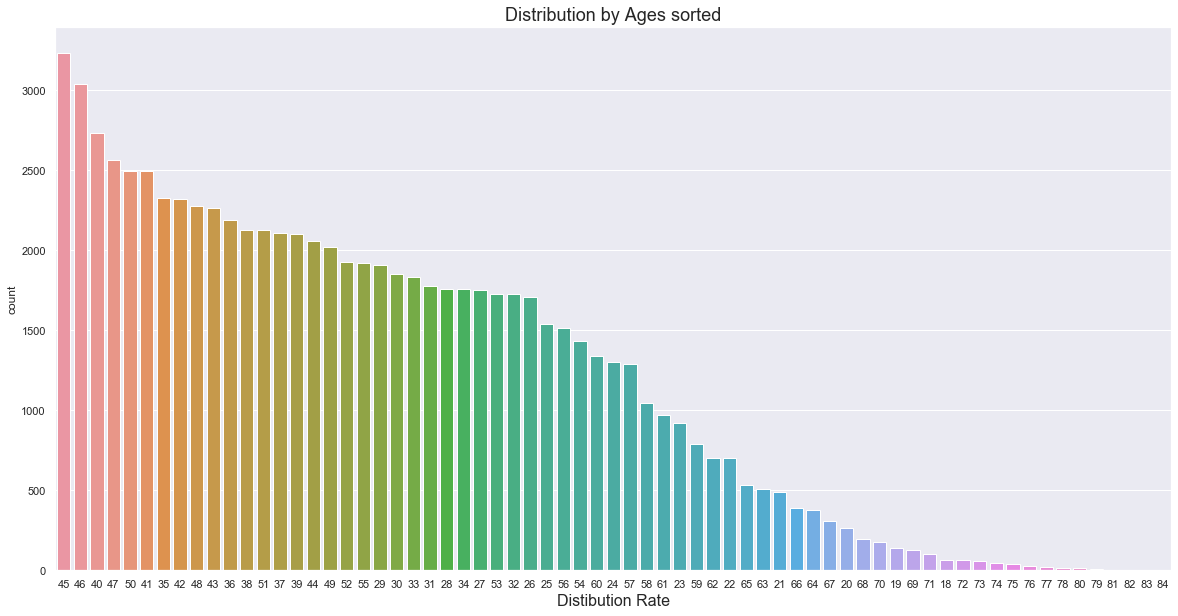

In [135]:
# figure size 지정
plt.figure(figsize = (20, 10))

# displot 함수로 분포 그리기
# 카운트가 높은 연령 기준으로 : value_counts와 index 메소드를 이용해서
age_count = sns.countplot('Age', data=marathon_2015_2017, order=marathon_2015_2017['Age'].value_counts().index)

# 제목, x라벨 ,y라벨 지정
age_count.set_title('Distribution by Ages sorted', fontsize=18)
age_count.set_xlabel('Ages', fontdict={'size':16})
age_count.set_xlabel('Distibution Rate', fontdict={'size':16})

plt.show()

# 9. Box plot

In [187]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
marathon_2015_2017 = pd.read_csv('data/marathon_2015_2017.csv')

In [189]:
print(marathon_2015_2017.shape)
marathon_2015_2017.head(3)

(79638, 21)


,Name,Age,M/F,City,State,Country,5K,10K,15K,20K,...,25K,30K,35K,40K,Pace,Official Time,Overall,Gender,Division,Year
0,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,883,1783,2697,3629,...,4567,5520,6479,7359,296,7757,1,1,1,2015
1,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,883,1783,2698,3628,...,4567,5519,6479,7362,298,7788,2,2,2,2015
2,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,883,1783,2697,3629,...,4567,5520,6479,7381,299,7822,3,3,3,2015


### 미국인 참가자만 가져오기

In [190]:
USA_runner = marathon_2015_2017[marathon_2015_2017.Country =='USA']

In [191]:
print(USA_runner.shape)
USA_runner.head(3)

(64474, 21)


,Name,Age,M/F,City,State,Country,5K,10K,15K,20K,...,25K,30K,35K,40K,Pace,Official Time,Overall,Gender,Division,Year
6,"Ritzenhein, Dathan",32,M,Rockford,MI,USA,885,1785,2720,3643,...,4565,5519,6486,7445,301,7880,7,7,7,2015
7,"Keflezighi, Meb",39,M,San Diego,CA,USA,884,1784,2699,3630,...,4567,5519,6479,7498,304,7962,8,8,8,2015
10,"Tegenkamp, Matt",33,M,Portland,OR,USA,886,1790,2733,3680,...,4628,5592,6592,7615,307,8032,11,11,11,2015


In [192]:
# 남녀 구분해서 데이터 저장
USA_MALE_runner = USA_runner[USA_runner['M/F'] == 'M']
USA_FEMALE_runner = USA_runner[USA_runner['M/F'] == 'F']

In [193]:
USA_MALE_runner.head(3)

,Name,Age,M/F,City,State,Country,5K,10K,15K,20K,...,25K,30K,35K,40K,Pace,Official Time,Overall,Gender,Division,Year
6,"Ritzenhein, Dathan",32,M,Rockford,MI,USA,885,1785,2720,3643,...,4565,5519,6486,7445,301,7880,7,7,7,2015
7,"Keflezighi, Meb",39,M,San Diego,CA,USA,884,1784,2699,3630,...,4567,5519,6479,7498,304,7962,8,8,8,2015
10,"Tegenkamp, Matt",33,M,Portland,OR,USA,886,1790,2733,3680,...,4628,5592,6592,7615,307,8032,11,11,11,2015


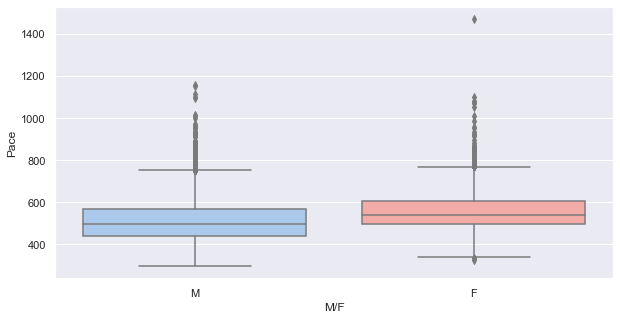

In [194]:
# figure size 정하기
plt.figure(figsize=(10, 5))

# 씨본의 스타일 지정
# 참고 : https://seaborn.pydata.org/generated/seaborn.set.html?highlight=set#seaborn.set
sns.set(style='darkgrid', palette = 'pastel') # style = "ticks", "whitegrid"   / palette = "pastel", "Set3"

# 박스플롯 그리기(기준 컬럼 : 'M/F', 'Pace')
sns.boxplot(x='M/F', y="Pace", palette=['b', 'r'], data=USA_runner)

### 실제 통계치 확인

In [195]:
USA_MALE_runner_stat = USA_MALE_runner['Pace'].describe()
USA_MALE_runner_stat

count    33390.00000
mean       514.22944
std         97.99571
min        298.00000
25%        442.00000
50%        495.00000
75%        566.00000
max       1157.00000
Name: Pace, dtype: float64

In [196]:
USA_FEMALE_runner_stat = USA_FEMALE_runner['Pace'].describe()
USA_FEMALE_runner_stat

count    31084.000000
mean       561.858448
std         88.425649
min        328.000000
25%        499.000000
50%        541.000000
75%        607.000000
max       1470.000000
Name: Pace, dtype: float64

# 10. Geo chart with Folium

In [ ]:
# pip install folium(실제 지도위에 그리는거)

In [152]:
# 참고 : https://youtu.be/Jt9nycjTGZs

In [197]:
import pandas as pd

marathon_2017 = pd.read_csv('data/marathon_results_2017.csv')

In [198]:
print(marathon_results_2017.shape)
marathon_2017.head(5)

(26410, 25)


,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,NaN,NaN,...,1:16:59,1:33:01,1:48:19,2:02:53,0:04:57,-,2:09:37,1,1,1
1,1,17,"Rupp, Galen",30,M,Portland,OR,USA,NaN,NaN,...,1:16:59,1:33:01,1:48:19,2:03:14,0:04:58,-,2:09:58,2,2,2
2,2,23,"Osako, Suguru",25,M,Machida-City,NaN,JPN,NaN,NaN,...,1:17:00,1:33:01,1:48:31,2:03:38,0:04:59,-,2:10:28,3,3,3
3,3,21,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,NaN,NaN,...,1:17:00,1:33:01,1:48:58,2:04:35,0:05:03,-,2:12:08,4,4,4
4,4,9,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,NaN,NaN,...,1:16:59,1:33:01,1:48:41,2:05:00,0:05:04,-,2:12:35,5,5,5


In [170]:
## 시간 데이터 object형태를 int형태로 바꿔준다.

In [199]:
import numpy as np 

# pd.to_timedelt() 적용하기
# .astype('m8[s]').astype(np.int64) 적용하기 : 초 단위로 바꾼 후, int 형태로 변환

points = ['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time']
for point in points:
    marathon_2017[point] = pd.to_timedelta(marathon_2017[point]).astype('m8[s]').astype(np.int64)


In [200]:
# 시간 데이터가 int 형태로 바뀌었는지 확인
marathon_2017.loc[:, '10K':'Pace'].head(3)

,10K,15K,20K,Half,25K,30K,35K,40K,Pace
0,1828,2744,3675,3875,4619,5581,6499,7373,297
1,1827,2744,3675,3875,4619,5581,6499,7394,298
2,1829,2744,3676,3876,4620,5581,6511,7418,299


In [201]:
# 참가자별 위치 파악하기
check_time = 7200    # 2시간
Lat = 0
Long = 0
Location = ''

# 5K, 10K, 15K, 20K, 25K, 30K, 35K, 40K
points = [[42.247835,-71.474357], [42.274032,-71.423979], [42.282364,-71.364801], [42.297870,-71.284260],
          [42.324830,-71.259660], [42.345680,-71.215169], [42.352089,-71.124947], [42.351510,-71.086980]]

In [202]:
# 26000개 행을 돌면서 위치가 어디인지 판단한다.
# iterrows() : 각각의 행을 돌아라는 뜻
marathon_location = pd.DataFrame(columns=['Lat','Long']) # 빈 df를 만들어두고,

# 각 행을 돌면서 Lat, Long 값을 넣어준다.
for index, record in marathon_2017.iterrows():
    if (record['40K'] < check_time):
        Lat = points[7][0]
        Long = points[7][1]
    elif (record['35K'] < check_time):
        Lat = points[6][0]
        Long = points[6][1]
    elif (record['30K'] < check_time):
        Lat = points[5][0]
        Long = points[5][1]
    elif (record['25K'] < check_time):
        Lat = points[4][0]
        Long = points[4][1]
    elif (record['20K'] < check_time):
        Lat = points[3][0]
        Long = points[3][1]
    elif (record['15K'] < check_time):
        Lat = points[2][0]
        Long = points[2][1]
    elif (record['10K'] < check_time):
        Lat = points[1][0]
        Long = points[1][1]
    elif (record['5K'] < check_time):
        Lat = points[0][0]
        Long = points[0][1]
    else:    
        Lat = points[0][0]
        Long = points[0][1]
    marathon_location = marathon_location.append({'Lat' : Lat, 'Long' : Long}, ignore_index=True)

In [203]:
print(marathon_location.shape)
marathon_location.head(3)

(26410, 2)


,Lat,Long
0,42.352089,-71.124947
1,42.352089,-71.124947
2,42.352089,-71.124947


### points 별로 카운트해서 그룹지어 주기

In [204]:
# 'Count'라는 컬럼 추가하기
marathon_count = marathon_location.groupby(['Lat', 'Long']).size().reset_index(name='Count')

In [205]:
# 7개 지역에 사람들의 분포를 확인 가능하다
marathon_count

,Lat,Long,Count
0,42.274032,-71.423979,49
1,42.282364,-71.364801,4435
2,42.297870,-71.284260,13866
3,42.324830,-71.259660,7261
4,42.345680,-71.215169,737
5,42.351510,-71.086980,6
6,42.352089,-71.124947,56


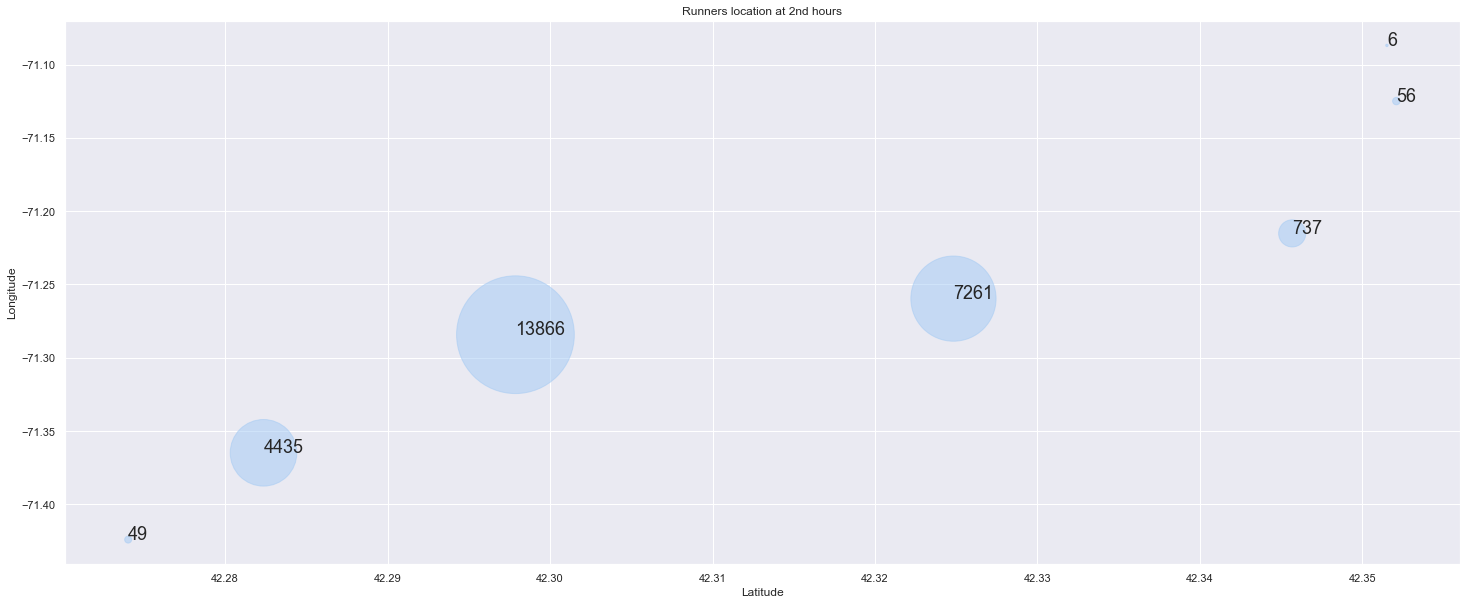

In [208]:
import matplotlib.pyplot as plt

# figure size 지정
plt.figure(figsize=(25, 10))

# scatter chart 적용
plt.scatter(marathon_count.Lat, marathon_count.Long, s=marathon_count.Count, alpha=0.5)

# 타이틀, 라벨 달기
plt.title('Runners location at 2nd hours')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# 위치 별 Count값 넣기
for i, txt in enumerate(marathon_count.Count):
    plt.annotate(txt, (marathon_count.Lat[i], marathon_count.Long[i]), fontsize=18)

plt.show()

## Folium을 이용해서 지도 위에 그리기

In [207]:
import folium
from folium.plugins import HeatMap  # 지도 위에 heatmap 표시하기

# Folium marathon map 그리기
marathon_map = folium.Map(location=[42.324830, -71.259660],  # 중심 위치(25km 지점으로 세팅함)
                         tiles='OpenStreetMap',  # 지도 타일 형태  # tiles='Stamen Toner', 'Stamen Terrain'
                         zoom_start=11)          # https://python-graph-gallery.com/288-map-background-with-folium/

HeatMap(marathon_count, radius=22).add_to(marathon_map) #radius = 반지름 add_to로 추가. 

marathon_map